# Color Compression

* Using KMeans algorithm we are to compress the colors of an image and see the result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

###### Loading the image flower.jpg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


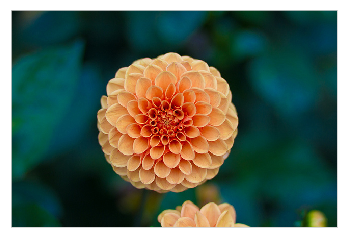

In [2]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(flower)

In [3]:
flower.shape

(427, 640, 3)

Here the dimension is 427/640 pixels, and there are 3 layers of color i.e, rgb

In [4]:
flower[10]

array([[ 4, 21, 15],
       [ 6, 23, 17],
       [ 6, 23, 17],
       ...,
       [ 1, 68, 59],
       [ 1, 68, 59],
       [ 0, 70, 59]], dtype=uint8)

Now the data is very large, so to normalize them into the scale of 0-1, dividing  the data by 255 will do

In [5]:
data = flower/255
data.shape

(427, 640, 3)

In [6]:
data[10]

array([[0.01568627, 0.08235294, 0.05882353],
       [0.02352941, 0.09019608, 0.06666667],
       [0.02352941, 0.09019608, 0.06666667],
       ...,
       [0.00392157, 0.26666667, 0.23137255],
       [0.00392157, 0.26666667, 0.23137255],
       [0.        , 0.2745098 , 0.23137255]])

In [7]:
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [8]:
def plot_pixels(data, title, colors=None):
#     colors = data if colors==None else 1
    if colors is None:colors = data
    
    #choosing a random subset
    rand = np.random.RandomState(0)
    i = rand.permutation(data.shape[0])[:1000]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color = colors, marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color = colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=25)

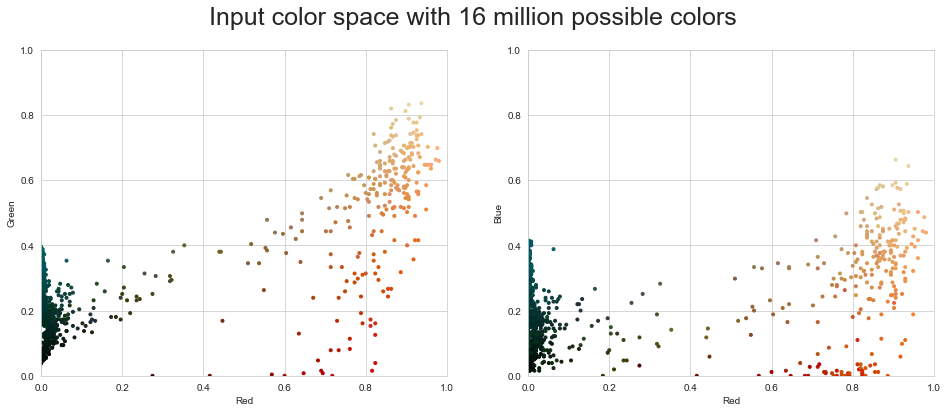

In [9]:
plot_pixels(data, title = 'Input color space with 16 million possible colors')

###### Using a faster module of KMeans algorithm: MiniBatchKMeans

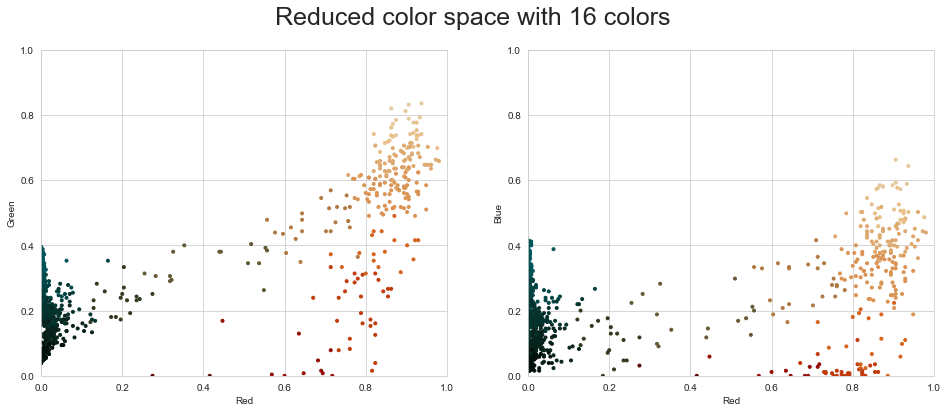

In [11]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
y_data = kmeans.fit_predict(data)
new_colors = kmeans.cluster_centers_[y_data]
plot_pixels(data, title = 'Reduced color space with 16 colors',colors = new_colors)

Text(0.5,1,'16-color Image')

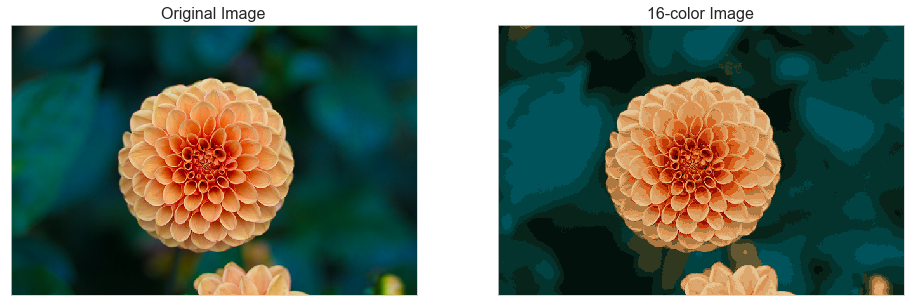

In [12]:
new_flower = new_colors.reshape(flower.shape)

fig,ax = plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(flower)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(new_flower)
ax[1].set_title('16-color Image',size=16)